<a href="https://colab.research.google.com/github/dhanushd1998/EDA-virat-kohli-dataset/blob/main/virat_kohli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go #visualization
import matplotlib.colors #visualization
import warnings
warnings.filterwarnings("ignore") #doesnt display warnings
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import plotly as py #visualization
from datetime import datetime #for formatting
import datetime as dt #date time
import matplotlib.ticker as mtick #plot ticks
from matplotlib.lines import Line2D #plot Lines

The above code is to make the necessary imports of the packages used in the EDA and Plotting

# **Data Loading**

In [8]:
virat_kohli = pd.read_csv('virat_kohli.csv')
virat_kohli.shape

(556, 15)

**Above** code helps to read the data from CSV and for manipulating them easily

# **Exploratory Data Analysis**

### Lets analyse our data set by viewing a few of them

In [9]:
np.random.seed(0) #seed for reproducibility
virat_kohli.head(10)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Venue Country,Match Type,MOM
0,26*,30,21,3,1,123.8,5,not out,2,v Zimbabwe,Harare,12/6/10,Zimbabwe,T20I,No
1,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Harare,6/13/10,Zimbabwe,T20I,No
2,28,28,19,5,0,147.36,1,bowled,1,v South Africa,Durban,9/1/11,South Africa,T20I,No
3,14,15,12,2,0,116.66,3,caught,1,v West Indies,Port of Spain,4/6/11,West Indies,T20I,No
4,4,5,5,0,0,80,4,caught,1,v England,Manchester,8/31/11,England,T20I,No
5,15,21,16,3,0,93.75,3,caught,1,v England,Eden Gardens,10/29/11,India,T20I,No
6,22,30,21,0,1,104.76,3,caught,2,v Australia,Sydney,1/2/12,Australia,T20I,No
7,31,29,24,3,0,129.16,3,caught,2,v Australia,Melbourne,3/2/12,Australia,T20I,No
8,DNB,-,-,-,-,-,-,-,2,v South Africa,Johannesburg,3/30/12,South Africa,T20I,No
9,68,65,48,11,1,141.66,3,caught,1,v Sri Lanka,Pallekele,7/8/12,Sri Lanka,T20I,Yes


**virat_kohli.head(5)**  displays the top 5 data set to give an idea about what we are dealing with

 Yes, it looks like there's some **missing values** and few **weird values**, Also date seems to be in **different formats**.
 Lets do some Initial **data exploration** and **data cleaning**

### Finding the null values.

In [10]:
# Operator to find null/ missing values
print('Percentage of null values in the given data set:')
for col in virat_kohli.columns:
  null_count = virat_kohli[col].isna().sum()/len(virat_kohli)*100
  if null_count > 0:
    print(f'{col}  : {round(null_count,2)}%')

Percentage of null values in the given data set:
Mins  : 0.18%
Venue Country  : 1.26%


Loops through the columns and finds the percentage of null values.


*  **Findings**: We can see that **Mins** and **Venue Country** has Null values.




### Finding Abnormal/ Weird values

There's only **3 mode of cricket** which is Internationally recognizable, so anything else is **invalid** as per our **limitation** or **assumption**. Let's stick to only these 3.

In [11]:

# Define valid values
valid_types = {"T20I", "ODI", "Test"}

# Find invalid values
invalid_types = virat_kohli[~virat_kohli['Match Type'].isin(valid_types)]

# Check if any invalid values exist
if invalid_types.empty:
    print("Valid values")
else:
    print("\nInvalid 'type' values:")
    print(invalid_types['type'].unique())

Valid values


Above code checks if the **Match Type** coulmn has any invalid values other than "T20I", "ODI", "Test". Loops through the column **Match Type** and finds the values which are not listed in the Valid Values.


**Findings**: Ok, so there seems to be no values other than the expected ones. Which is good!

## Let's deal with the missing Data

#### For the given dataset, with N = 556, my approach for data cleaning will be:

 1. I will replace NULL values in the **'Venue Country'** column with the **MODE** value.

     **Why?:** Since the **'Venue Country'** column is categorical, replacing missing values with the most common Venue Country (the **mode**) seems like a good choice. Because I’m keeping the most frequent value, which makes sense for the analysis. Also the

 2. I will replace NULL values in the **' Mins'**  column with the **MEAN** value.
     **Why?:** Since the **'Mins'** column is numerical, replacing missing values with the average time spent on ground (the **Mean**) seems like a good choice.  

3. In **'Runs'**  column I will remove ( * Asteric )  sign next to the **score** , it just represents the player is **Not out**. Also few values have **DNB /TDNB** which means **Did not Bat** I  will drop the whole row.  
     **Why?:** The **'Runs'** column being null can only mean that **Virat Kohli** didn't get a chance to play in the match. It doesn't make sense to us to keep the records where he hasn't contributed. It’s better to drop that row so it doesn't mess up the analysis.

4. I will also make sure that seemingly **numerical columns** are of the assumed type.



In [12]:

# Remove rows where Runs is 'DNB' or 'TDNB'
virat_kohli = virat_kohli[~virat_kohli['Runs'].isin(['DNB', 'TDNB'])]

# Convert 'Mins' to numeric, coercing errors to NaN
virat_kohli['Mins'] = pd.to_numeric(virat_kohli['Mins'], errors='coerce')

# Replace NaN in 'Mins' with its Mean
mins_mean = virat_kohli['Mins'].mean()
virat_kohli['Mins'] = virat_kohli['Mins'].fillna(mins_mean)

# Replace NaN in 'Venue Country' with its mode
venue_mode = virat_kohli['Venue Country'].mode()[0]
virat_kohli['Venue Country'] = virat_kohli['Venue Country'].fillna(venue_mode)

# Remove '*' from Runs values and convert to integer
virat_kohli['Runs'] = virat_kohli['Runs'].str.replace('*', '', regex=False).astype(int)


# Step 4: Clean numeric columns by removing '*' and converting to numbers
cols_to_clean = ["Runs", "SR", "BF", "Mins", "Pos", "6s", "4s", "Inns"]
for col in cols_to_clean:

    virat_kohli[col] = pd.to_numeric(virat_kohli[col], errors='coerce')



# Step 5: Reset index
virat_kohli.reset_index(drop=True, inplace=True)


Above code
* Drop rows where 'Runs' are TDNB/DNB are missing
* Replace missing values in 'Venue Country' with its mode
* Replace missing values in 'Mins' with its mean
* Removes * symbol in Runs columns
* Reset index after dropping rows

Its not possible to have a score, **less than 0** or **above 1350** (Maximum balls 225/ side. Maximum score/ ball is 6. 225 * 6 = 1350). So anything beyond the range should be outlier or invalid.



In [13]:
if (virat_kohli['Runs'] > 1250).any() | (virat_kohli['Runs'] < 0).any():
    print("There are values both above 1250 and below 0.")
else:
    print("Valid range")

Valid range


**Findings:** Look's like all the score's are within the valid range





For a **fact** we know that, **Kohli's date of birth** is in the year **1986** and the last match would have been played in the year **2025**. So its not possible to have played a match before or after this range. So as an outlier (of fact) we will discard them.

In [14]:
virat_kohli['Start Date'] = pd.to_datetime(virat_kohli['Start Date'], errors='coerce')

# Filter to keep only rows where year is between 1986 and 2025
virat_kohli = virat_kohli[virat_kohli['Start Date'].dt.year.between(1986, 2025)]

**Findings:** Look's like all the score's are within the valid range

Let's create a new data frame, named **virat_kohli_cleaned** just for our understanding

In [15]:
virat_kohli_cleaned = virat_kohli

## Post cleaning observation

In [16]:
virat_kohli_cleaned.sample(20)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Venue Country,Match Type,MOM
403,48,66.0,51,4,1,94.11,3,bowled,1,v Sri Lanka,Fatullah,2014-02-28,Bangladesh,ODI,No
289,27,20.0,19,4,0,142.10,7,bowled,1,v Sri Lanka,Rajkot,2009-12-15,India,ODI,No
477,36,76.0,54,2,0,66.66,3,run out,1,v South Africa,Gqeberha,2018-02-13,South Africa,ODI,No
78,85,88.0,61,4,3,139.34,3,caught,2,v Australia,Sydney,2020-08-12,Australia,T20I,Yes
382,31,62.0,52,4,0,59.61,3,lbw,1,v Sri Lanka,Port of Spain,2013-09-07,West Indies,ODI,No
348,23,15.0,11,3,0,209.09,6,not out,1,v West Indies,Indore,2011-08-12,India,ODI,No
310,118,193.0,121,11,1,97.52,3,caught,2,v Australia,Visakhapatnam,2010-10-20,India,ODI,Yes
272,79,273.0,201,12,1,39.30,4,caught,1,v South Africa,Cape Town,2022-11-01,South Africa,Test,No
236,23,64.0,59,4,0,38.98,4,caught,1,v Australia,Sydney,2019-03-01,Australia,Test,No
343,86,100.0,99,11,0,86.86,4,not out,2,v England,Wankhede,2011-10-23,India,ODI,Yes


Lets check the data types to make sure it's of the expected type for further manipulations

In [17]:
data_types = pd.DataFrame(virat_kohli_cleaned.dtypes, columns=['Data Type'])
print(data_types)

                    Data Type
Runs                    int64
Mins                  float64
BF                      int64
4s                      int64
6s                      int64
SR                    float64
Pos                     int64
Dismissal              object
Inns                    int64
Opposition             object
Ground                 object
Start Date     datetime64[ns]
Venue Country          object
Match Type             object
MOM                    object


# **Summary statistics**

The below code gives us the summary statistics of the data set. IQR1, IQR2, Mean, Standard Deviation, Minimum value & Maximum values are shown.

In [18]:
virat_kohli_cleaned.describe()

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Start Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,531.000000,532.000000,532.000000,532
mean,45.819549,81.162264,57.631579,4.550752,0.498120,78.083013,3.533835,1.744361,2016-02-18 05:43:45.563909632
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008-08-18 00:00:00
25%,11.000000,25.000000,17.000000,1.000000,0.000000,48.615000,3.000000,1.000000,2013-01-22 00:00:00
50%,33.000000,62.500000,41.000000,3.000000,0.000000,73.070000,3.000000,2.000000,2016-02-12 00:00:00
75%,68.500000,109.250000,82.000000,7.000000,1.000000,103.560000,4.000000,2.000000,2019-01-15 18:00:00
max,254.000000,536.000000,366.000000,33.000000,7.000000,241.370000,7.000000,4.000000,2022-12-03 00:00:00
std,44.290657,80.149014,57.666353,4.941395,1.020504,44.826650,0.859631,0.803984,NaN


Let's **extract** the year from **Start Date** and create a new column as **"Year"** as we might need this later.

In [19]:
# Extract Year
virat_kohli_cleaned['Year'] = virat_kohli_cleaned['Start Date'].dt.year
print(virat_kohli_cleaned[['Start Date', 'Year']].head())

  Start Date  Year
0 2010-12-06  2010
1 2011-09-01  2011
2 2011-04-06  2011
3 2011-08-31  2011
4 2011-10-29  2011


In [20]:
virat_kohli_cleaned.shape

(532, 16)

## Let's plot Histogram and Box Plots to observe the spread and catch outliers and check the distribution

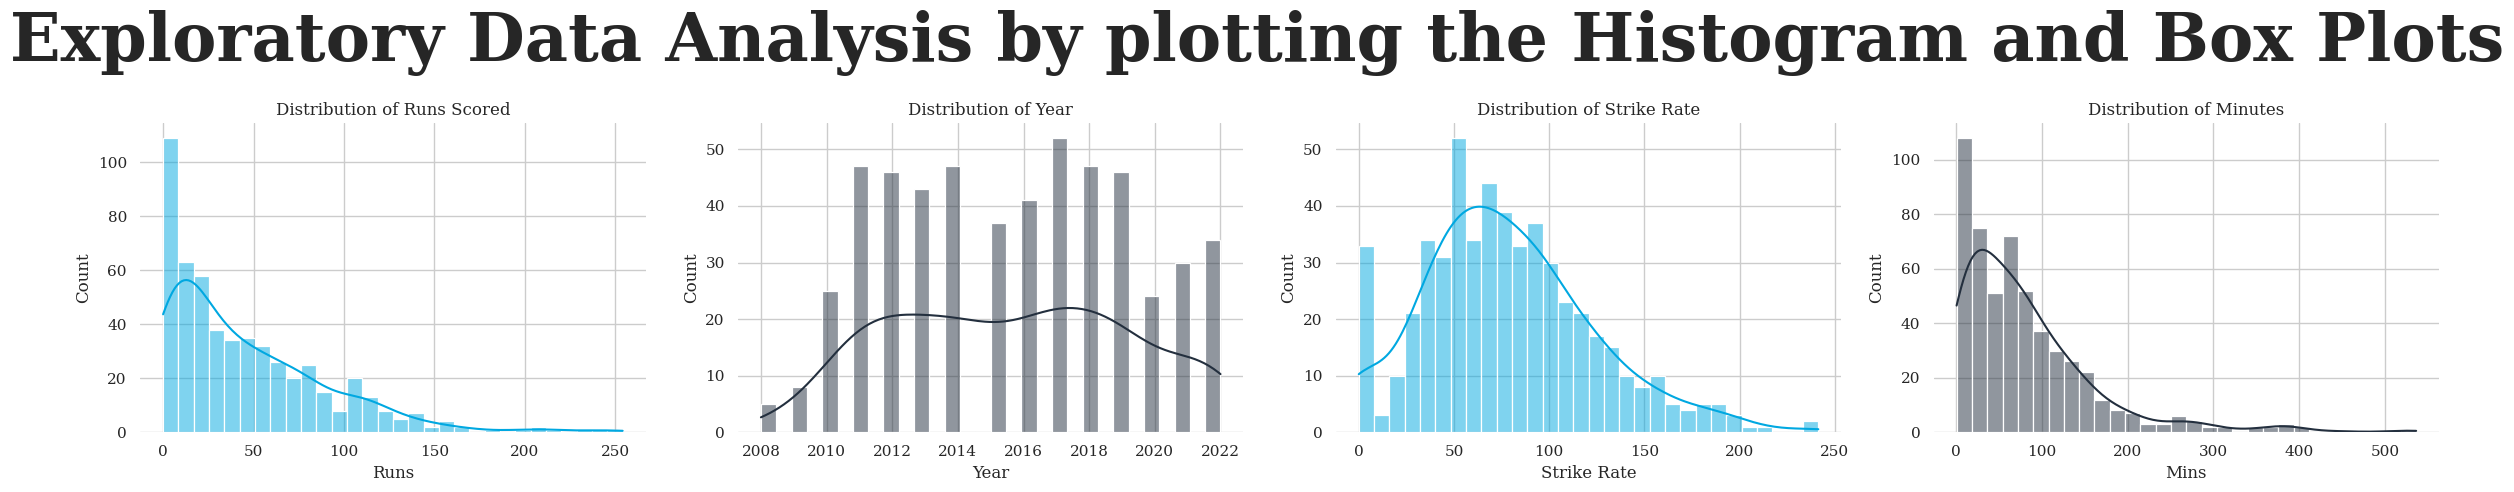

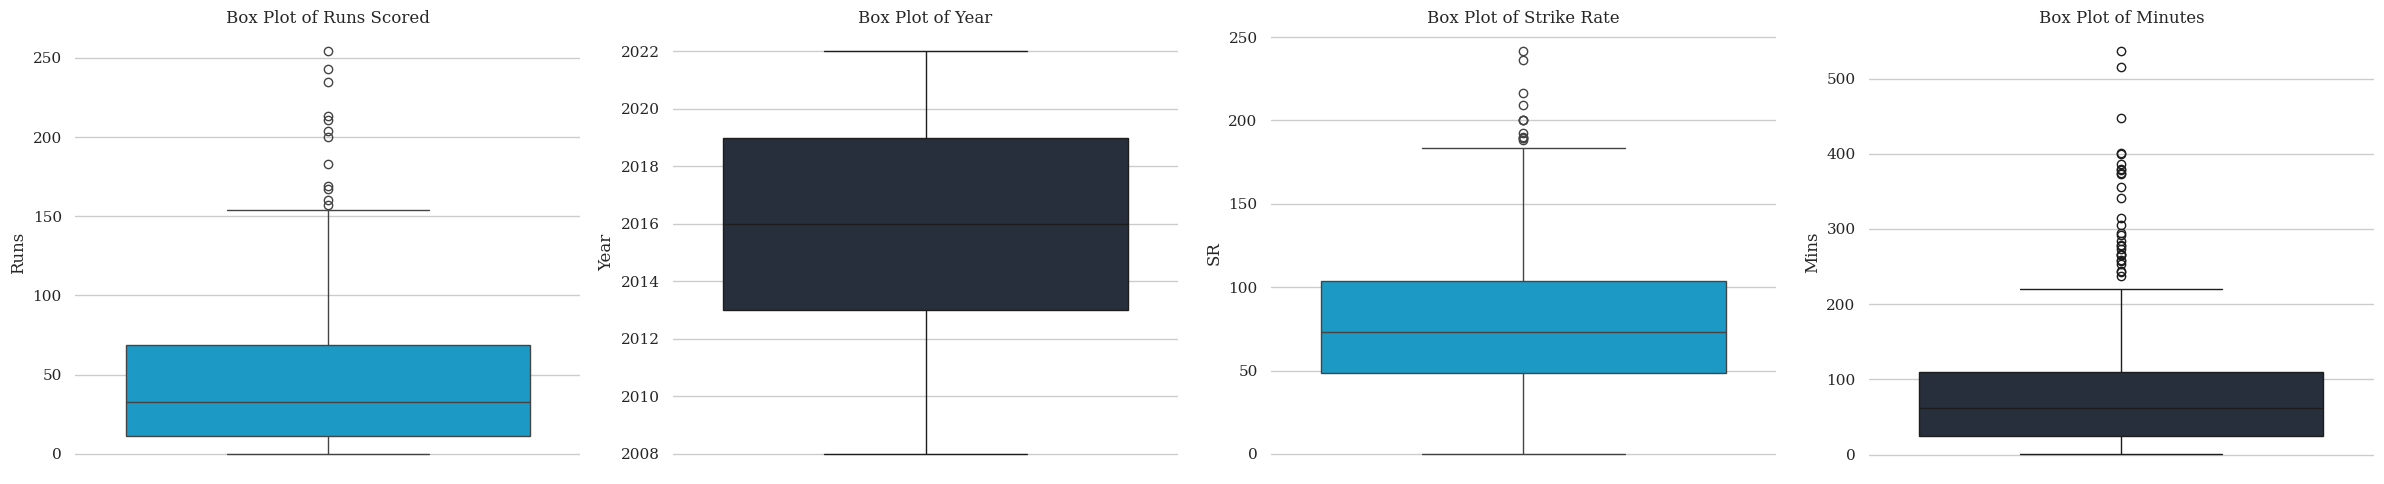

In [21]:
#seaborn style and color palette
sns.set(style="whitegrid", rc={"font.family": "serif"})
palette = ['#00A8E1', '#232F3E']

#subplots for histograms
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle("Exploratory Data Analysis by plotting the Histogram and Box Plots", fontsize=48, fontweight='bold', family='serif')

#to remove the border for aesthetics
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

# Histogram for Runs
sns.histplot(virat_kohli_cleaned['Runs'], bins=30, kde=True, ax=axes[0], color=palette[0])
axes[0].set_title("Distribution of Runs Scored")
axes[0].set_xlabel("Runs")

# Histogram for Year
sns.histplot(virat_kohli_cleaned['Year'].dropna(), bins=30, kde=True, ax=axes[1], color=palette[1])
axes[1].set_title("Distribution of Year")
axes[1].set_xlabel("Year")

# Histogram for Strike Rate
virat_kohli['SR'] = pd.to_numeric(virat_kohli_cleaned['SR'], errors='coerce')
sns.histplot(virat_kohli_cleaned['SR'].dropna(), bins=30, kde=True, ax=axes[2], color=palette[0])
axes[2].set_title("Distribution of Strike Rate")
axes[2].set_xlabel("Strike Rate")

# Histogram for Mins
virat_kohli_cleaned['Mins'] = pd.to_numeric(virat_kohli['Mins'], errors='coerce')
sns.histplot(virat_kohli_cleaned['Mins'].dropna(), bins=30, kde=True, ax=axes[3], color=palette[1])
axes[3].set_title("Distribution of Minutes")
axes[3].set_xlabel("Mins")

plt.tight_layout()
plt.show()

#  subplots for box plots
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
#to remove the border for aesthetics
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

# Box plot for Runs
sns.boxplot(y=virat_kohli_cleaned['Runs'], ax=axes[0], color=palette[0])
axes[0].set_title("Box Plot of Runs Scored")

# Box plot for Year
sns.boxplot(y=virat_kohli_cleaned['Year'], ax=axes[1], color=palette[1])
axes[1].set_title("Box Plot of Year")

# Box plot for Strike Rate
sns.boxplot(y=virat_kohli_cleaned['SR'], ax=axes[2], color=palette[0])
axes[2].set_title("Box Plot of Strike Rate")


# Box plot for Mins
sns.boxplot(y=virat_kohli_cleaned['Mins'], ax=axes[3], color=palette[1])
axes[3].set_title("Box Plot of Minutes")
# display the plots
plt.tight_layout()
plt.show()




#**Analysis**

##1. **Runs Scored**

Distribution looks **Right-skewed** which conveys majority of innings are **under 50 runs**, with **frequency dropping** as **scores increase**.

**Median** lies in the range **30-35 runs**. Innings **above** 150 runs seems like **outlier** but may reflect standout performances (centuries or 150+).

##2. **Year**

Distribution is **balanced** from **2008 to 2022**, with a **higher number** of innings between **2011 and 2020**.

**Boxplot** Indicates consistent presence in cricket over the years.
 Stable and long-spanning career, with **peak** around **2016 to 2018**.

 **Less number** of innings in the **early** and recent years may be due to factors such as **age** or since the data is only till 2022, could be due to **COVID 19 Pandemic** as well  .

##3. **Minutes at the Crease (Play time)**

**Distribution** is  **skewed towards right**. Most innings are **short to moderate** in duration under 100 minutes suggesting he would have played **T20I and ODI more** (Shorter format of the same).

**Boxplot** shows  **Median** at around **75–90 minutes**.  Innings **over** 300 minutes,isnt an outlier but indicating some very longer stay at the ground especially in Test matches (Longer format of the game).

##4. **Strike Rate (SR)**

**Boxplot Analysis** shows **Median** at about **70–75**.

**Most innings** with **strike rates** above **150–200**.Depicts that his inings are **explosive** and **consistent**.

#**Overall Insights**

**Consistency**: Most innings fall in a stable range, shows reliability.

**Versatility**: Value of **Strike rate** has **high variance** shows adaptability across formats.

**Peak Performance**: Years during **2016–2018** stands out as a particularly productive period.

**Exceptional Performances**: Across the metric analysed show Kohli's potential for match-defining contributions which is supported by valid **outliers**.


#Logistic regression
We have the **column MOM**, which means **Man of the Match Awarded**,
 which is given if a player has an impactful innings in the match.
As, a batsman Kohli, needs to **score runs** to **get the award**.
###So, would **higher score** tend to fetch his **MOM Award**?


##Data Conversion
Lets create a new Column **MOM_Won** by converting the MOM Column to **boolean** for easier manipulation, lets asign :

**YES = 1
NO = 0**


In [22]:
virat_kohli_cleaned['MOM_Won'] = virat_kohli_cleaned['MOM'].map({'Yes': 1, 'No': 0})

Lets the check how the **probability** of winning **MOM Award** with **Runs scored** varies.

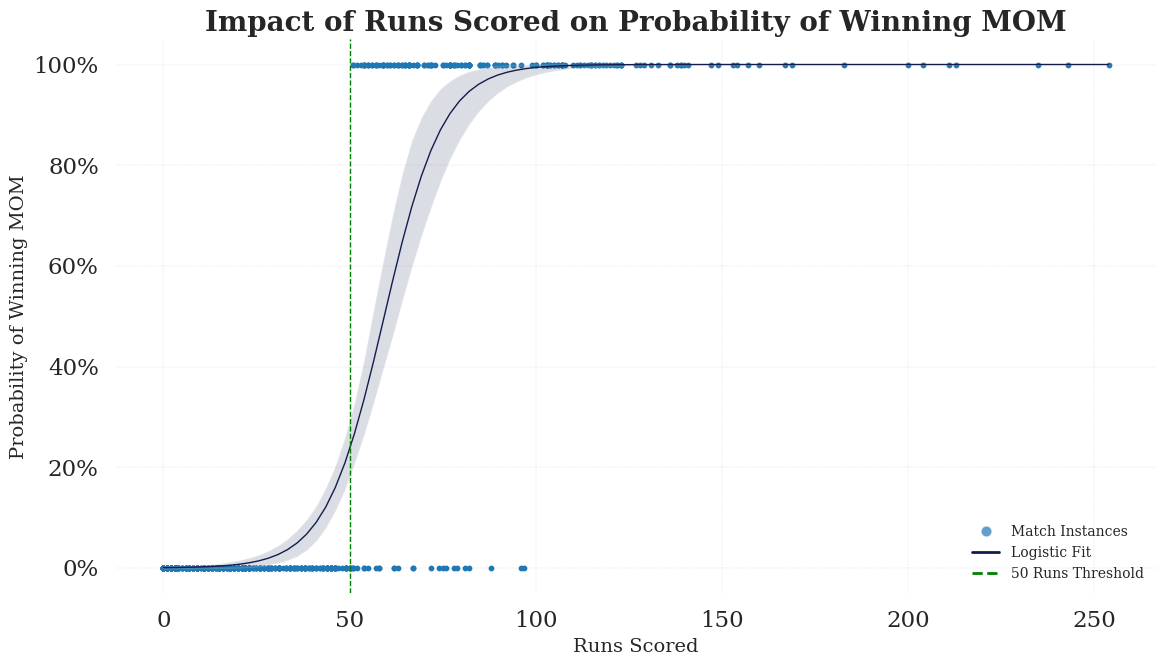

In [23]:


# Set  style
sns.set(style='whitegrid', context='talk')
plt.rcParams['font.family'] = 'serif'

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.regplot(
    x='Runs',
    y='MOM_Won',
    data=virat_kohli_cleaned,
    logistic=True,
    ci=95,
    scatter_kws={'s': 10, 'alpha': 1, 'color': '#1f77b4'},
    line_kws={'color': '#131d4d', 'lw': 1}
)

# Title and labels
plt.title('Impact of Runs Scored on Probability of Winning MOM', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=14)
plt.ylabel('Probability of Winning MOM', fontsize=14)

# Add vertical threshold line at 50 runs
plt.axvline(x=50, color='green', linestyle='--', linewidth=1)

# Format Y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Custom legend items
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Match Instances',
           markerfacecolor='#1f77b4', markersize=8, alpha=0.7),
    Line2D([0], [0], color='#131d4d', lw=2, label='Logistic Fit'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', label='50 Runs Threshold')
]

# Add legend
ax.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=10)

# Remove all spines for clean look
for spine in ax.spines.values():
    spine.set_visible(False)

# Add subtle grid
plt.grid(True, linestyle='--', linewidth=0.2, alpha=1)

# Tight layout
plt.tight_layout()
plt.show()


#  **Insights**
The plot shows **Strong Positive Correlation**

As the **number of runs increases**, the **probability of winning MOM increases** sharply.
Critical Point seems at ≈ 50 Runs:

Around the **50-run mark**, the **logistic curve** starts to **rise rapidly**.
This suggests that **scoring a half-century** significantly **boosts** the **chances of winning MOM**.


**Effect Beyond 100 Runs:**

**After ~100 runs**, the **curve flattens** near **100**%.

Which implies once he scores a **century**, his **MOM probability** is almost **guaranteed**.

**Below 30 Runs** = **Very Low** MOM Chances:

The curve is flat, **nearly 0% **until around **30–35 runs**, meaning **low scores** may **not earn**  MOM.

# **In Summary**:

"Scoring **more runs** strongly **increases** Virat Kohli’s likelihood of winning the **Man of the Match award** , especially once he crosses **50 runs**."

# Pointbiserial Correlation

In [24]:
import pandas as pd
from scipy.stats import pointbiserialr

# Compute Point-Biserial Correlation
correlation, p_value = pointbiserialr(virat_kohli_cleaned['MOM_Won'], virat_kohli_cleaned['Runs'])

print(f"Correlation Coefficient (Point-Biserial): {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation Coefficient (Point-Biserial): 0.79
P-value: 0.0000


# **Results and Inferences**
**Null Hypothesis**: There is no correlation with Runs scored and Man of the match being won.

**Point-Biserial Correlation**

*   Correlation Coefficient (r): 0.79
*   P-value: < 0.0001

**Interpretation:**
There is a **strong positive point-biserial correlation** between the **Runs Scored** and the **Man of the match won**.

**The coefficient**
𝑟= 0.79, suggests as the** number of runs increases**, the probability of winning the MOM award also increases.


The p-value < 0.0001 indicates that this relationship is statistically significants ( α = 0.05), meaning we reject the null hypothesis of no correlation.

# **Conclusion**:
There’s a **clear** and **strong link** between how many runs Virat Kohli scores and whether he wins the Man of the Match award.
In matches where he **scores more**, his **chances of winning MOM increase** significantly.

But correlation doesnt imply causation so we cant predict AND confirm the analysis.

###Let's export the data set for Streamlit Dashboard.

In [25]:
virat_kohli_cleaned.to_csv("data_for_streamlit.csv", index=False)